In [1]:
"""
Use any programming language you'd like (Preferably Python and Keras or TensorFlow)
1. Implement a CNN in which the input is a noisy number and the output is a denoised number.
Use MNIST dataset. Use Gaussian distribution to add noise to the input. Plot the training & validation loss.
Build a classifier based on the trained Autoencoder. Extract the trained encoder and add some fully connected 
layers to classify the digits [Semi - Supervised Classification using Autoencoders]. Look up Google for more info."""

# 1. Implementation of a CNN in which the input is a noisy number and the output is a denoised number.

# Importing the required Keras modules containing model and layers
from keras.models import Model, Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Dropout, Flatten
# Creating a Sequential Model and adding the layers



Using TensorFlow backend.
/home/admin-pc/.virtualenvs/cv2_python3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/admin-pc/.virtualenvs/cv2_python3/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/home/admin-pc/.virtualenvs/cv2_python3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/admin-pc/.virtualenvs/cv2_python3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/admin-pc/.v

In [56]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

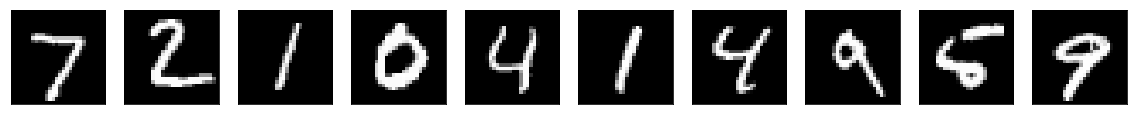

In [70]:
# Visiualize the dataset 

import matplotlib.pyplot as plt

n = 10  
plt.figure(figsize=(20, 4))

for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [4]:
# The encoding process
input_img = Input(shape=(28, 28, 1))  

############
# Encoding #
############

# Conv1 #
x = Conv2D(filters = 16, kernel_size = (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D(pool_size = (2, 2), padding='same')(x)

# Conv2 #
x = Conv2D(filters = 8, kernel_size = (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size = (2, 2), padding='same')(x) 

# Conv 3 #
x = Conv2D(filters = 8,kernel_size = (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D(pool_size = (2, 2), padding='same')(x)
encoded_2 = MaxPooling2D(pool_size = (2, 2), padding='same')(x)
# Note:
# padding is a hyper-arameter for either 'valid' or 'same'. 
# "valid" means "no padding". 
# "same" results in padding the input such that the output has the same length as the original input.



In [5]:

############
# Decoding #
############

# DeConv1
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)

# DeConv2
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

# Deconv3
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [9]:
# Declare the model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


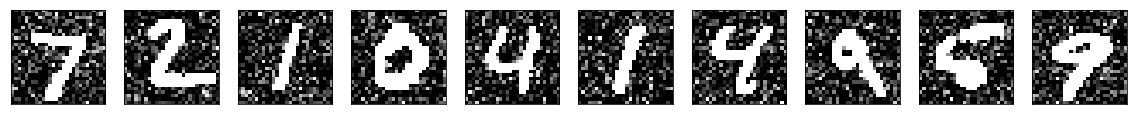

In [6]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

noise_factor = 0.4

# Gaussian distribution/ Normal distribution
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)



# Visiualize the x_test_noisy
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


In [50]:
# Train the model. Note: you can skip this step as model is saved already.

his = autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test)
               )
autoencoder.save('cnn_autoencoder_digit_classifier.model')

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 46s - loss: -506.2251 - val_loss: -529.3886
Epoch 2/100
60000/60000 [==============================] - 45s - loss: -523.8211 - val_loss: -531.4728
Epoch 3/100
60000/60000 [==============================] - 45s - loss: -524.5262 - val_loss: -532.2657
Epoch 4/100
60000/60000 [==============================] - 44s - loss: -524.7957 - val_loss: -532.4682
Epoch 5/100
60000/60000 [==============================] - 44s - loss: -524.9641 - val_loss: -532.4496
Epoch 6/100
60000/60000 [==============================] - 42s - loss: -525.0797 - val_loss: -532.7257
Epoch 7/100
60000/60000 [==============================] - 44s - loss: -525.1917 - val_loss: -532.7575
Epoch 8/100
60000/60000 [==============================] - 44s - loss: -525.2674 - val_loss: -532.7898
Epoch 9/100
60000/60000 [==============================] - 43s - loss: -525.3316 - val_loss: -532.8733
Epoch 10/100
60000/6000

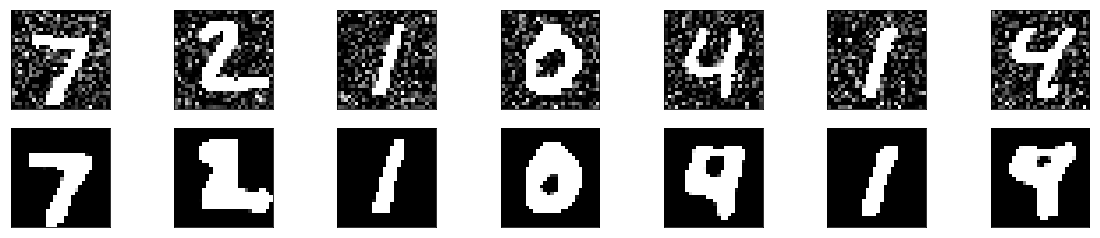

In [37]:
# Loading the model
autoencoder = tf.keras.models.load_model('cnn_autoencoder_digit_classifier.model')

# Making predictions
decoded_imgs = autoencoder.predict(x_test_noisy)

# Visualizing the predictions
n = 7
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

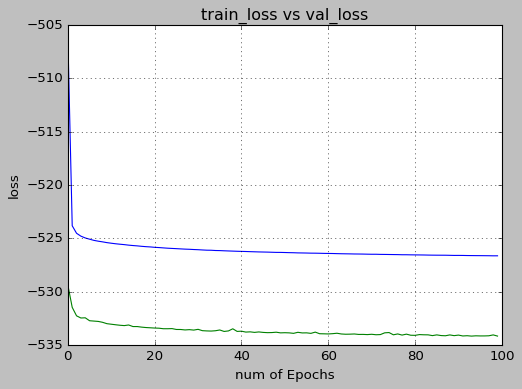

In [79]:
# 2. Plotting the training & validation loss.

train_loss=his.history['loss']
val_loss=his.history['val_loss']
# train_acc=his.history['acc']
# val_acc=his.history['val_acc']
xc=range(100)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)



In [80]:
autoencoder.save_weights('cnn_autoencoder_digit_classifier_weights.h5')


In [57]:
# load datset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [65]:
# 3. Extracting encoder layer and building a model to classify the digits.
input_shape = (28, 28, 1)
hidden_representation = Sequential()
hidden_representation.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
# hidden_representation.add(autoencoder.layers[1])
hidden_representation.add(autoencoder.layers[2])
hidden_representation.add(Flatten())
hidden_representation.add(Dense(128, activation=tf.nn.relu))
hidden_representation.add(Dropout(0.2))
hidden_representation.add(Dense(10,activation=tf.nn.softmax))

In [66]:
hidden_representation.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
# y_train_c = keras.utils.to_categorical(y_train, num_classes=None)
hidden_representation.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 16s 267us/sample - loss: 0.2045 - acc: 0.9387
Epoch 2/10
60000/60000 [==============================] - 16s 264us/sample - loss: 0.0828 - acc: 0.9751
Epoch 3/10
60000/60000 [==============================] - 16s 266us/sample - loss: 0.0575 - acc: 0.9821
Epoch 4/10
60000/60000 [==============================] - 17s 278us/sample - loss: 0.0457 - acc: 0.9853
Epoch 5/10
60000/60000 [==============================] - 16s 267us/sample - loss: 0.0352 - acc: 0.9887
Epoch 6/10
60000/60000 [==============================] - 16s 273us/sample - loss: 0.0314 - acc: 0.9896
Epoch 7/10
60000/60000 [==============================] - 16s 274us/sample - loss: 0.0254 - acc: 0.9915
Epoch 8/10
60000/60000 [==============================] - 16s 273us/sample - loss: 0.0216 - acc: 0.9925
Epoch 9/10
60000/60000 [==============================] - 17s 277us/sample - loss: 0.0194 - acc: 0.9937
Epoch 10/10
60000/60000 [==============================] - 17s 2

In [72]:
hidden_representation.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 106us/sample - loss: 0.0554 - acc: 0.9856


[0.05541581680829859, 0.9856]

In [68]:
hidden_representation.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 multiple                  0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 4732)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               605824    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 607,394
Trainable params: 607,394
Non-trainable params: 0
________________________________________________

In [69]:
hidden_representation.save('cnn_encoder_extraction_digit_classifier.model')

3


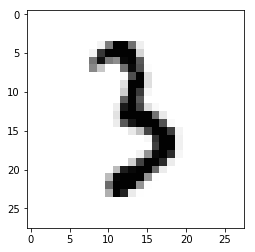

In [67]:
# Demo of classifier prediction.

image_index = 44
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
reshaped_img = x_test[image_index].reshape(1, 28, 28, 1)
pred = hidden_representation.predict(reshaped_img)
print(pred.argmax())

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# from tensorflow.keras import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
import tensorflow as tf

new_model = tf.keras.models.load_model('cnn_autoencoder_digit_classifier.model')

In [14]:
# Additional work : Trying to build a network with sum of noisy and unnoisy data.

input_shape = (28, 28, 1)
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))


decoded_x_train = new_model.predict(x_train_noisy)
new_x_trained = np.concatenate((decoded_x_train, x_train), axis=0)
new_y_trained = np.concatenate((y_train, y_train), axis=0)

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])


final_model_his = model.fit(x=new_x_trained, y=new_y_trained, epochs=10)
model.save('cnn_TR120000_number_reader_with_noise.model')

Epoch 1/10
120000/120000 [==============================] - 48s - loss: 2.2725 - acc: 0.7491    
Epoch 2/10
120000/120000 [==============================] - 46s - loss: 1.7789 - acc: 0.8028    
Epoch 3/10
120000/120000 [==============================] - 50s - loss: 1.5858 - acc: 0.8218    
Epoch 4/10
120000/120000 [==============================] - 51s - loss: 1.5175 - acc: 0.8278    
Epoch 5/10
120000/120000 [==============================] - 52s - loss: 1.5302 - acc: 0.8302    
Epoch 6/10
120000/120000 [==============================] - 51s - loss: 1.3753 - acc: 0.8406    
Epoch 7/10
120000/120000 [==============================] - 51s - loss: 1.4625 - acc: 0.8370    
Epoch 8/10
120000/120000 [==============================] - 51s - loss: 1.3878 - acc: 0.8416    
Epoch 9/10
120000/120000 [==============================] - 51s - loss: 1.3761 - acc: 0.8465    
Epoch 10/10
120000/120000 [==============================] - 52s - loss: 1.4294 - acc: 0.8419    


In [20]:
model_trained_without_noise = tf.keras.models.load_model('cnn_TR60000_number_reader.model')

In [45]:
prediction_by_model_v1 = model_trained_without_noise.predict(x_test_noisy)


9


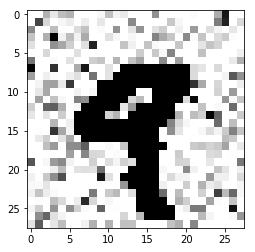

In [31]:
image_index = 4
plt.imshow(x_train_noisy[image_index].reshape(28, 28),cmap='Greys')
reshaped_img = x_train_noisy[image_index].reshape(1, 28, 28, 1)
pred = model.predict(reshaped_img)
print(pred.argmax())


In [46]:
# image_index = 4
index_classified = []
index_classified_v1 = []
index_classified_v2 = []
# plt.imshow(x_train_noisy[image_index].reshape(28, 28),cmap='Greys')
for image_index in range(len(y_test)):
    reshaped_img = x_test_noisy[image_index].reshape(1, 28, 28, 1)
    pred_v1 = model_trained_without_noise.predict(reshaped_img)
    pred_v2 = model.predict(reshaped_img)
    label = y_test[image_index]
    if pred_v1.argmax() != label and pred_v2.argmax() == label:
        index_classified.append(image_index)
    if pred_v1.argmax() == label: index_classified_v1.append(image_index)
    if pred_v2.argmax() == label: index_classified_v2.append(image_index)
#         print(y_test[image_index], pred_v1.argmax(), pred_v2.argmax())
v1_accuracy = (len(index_classified_v1)/len(x_test_noisy))*100
v2_accuracy = (len(index_classified_v2)/len(x_test_noisy))*100
print("Acurracy on noisy test dataset : V1: {} % V2: {} %".format(v1_accuracy, v2_accuracy))
print("Total text miss classified by v1 and True classified by v2 : ", len(index_classified), index_classified)

Acurracy on noisy test dataset : V1: 88.7 % V2: 78.21000000000001 %
Total text miss classified by v1 and True classified by v2 :  692 [48, 49, 65, 66, 80, 95, 111, 115, 121, 139, 159, 166, 167, 182, 199, 211, 219, 222, 250, 273, 282, 301, 308, 317, 325, 340, 347, 376, 395, 399, 405, 406, 412, 428, 433, 445, 447, 460, 502, 519, 532, 547, 571, 619, 645, 659, 689, 694, 712, 738, 748, 752, 756, 760, 766, 775, 791, 797, 834, 857, 869, 874, 881, 922, 951, 955, 975, 990, 1002, 1022, 1024, 1032, 1046, 1059, 1082, 1087, 1089, 1112, 1116, 1135, 1153, 1156, 1157, 1169, 1178, 1182, 1242, 1243, 1244, 1270, 1274, 1285, 1289, 1299, 1331, 1357, 1370, 1376, 1378, 1391, 1395, 1403, 1405, 1406, 1411, 1422, 1440, 1447, 1453, 1467, 1475, 1505, 1516, 1518, 1543, 1546, 1549, 1551, 1557, 1566, 1571, 1575, 1614, 1620, 1621, 1637, 1684, 1688, 1725, 1741, 1747, 1751, 1767, 1806, 1809, 1816, 1847, 1864, 1865, 1871, 1879, 1911, 1938, 1940, 1941, 1943, 1956, 1970, 2001, 2025, 2035, 2053, 2073, 2078, 2090, 2094, 209